In [ ]:
!pip install split-folders

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayantikalaskar","key":"9c46cbc3dc0f3d53e9eef348359a288e"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
100% 1.51G/1.52G [00:25<00:00, 113MB/s]
100% 1.52G/1.52G [00:25<00:00, 64.1MB/s]


In [ ]:
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [ ]:
import splitfolders
splitfolders.ratio(
    "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   seed=7,
   ratio=(0.7,0.15, 0.15)
)

Copying files: 12446 files [00:09, 1277.11 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode="reflect"
)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

# Define the validation data generator without augmentation, only rescaling
val_datagen = ImageDataGenerator(rescale=1/255.0)

# Create the validation data generator
val_generator = val_datagen.flow_from_directory(
    './dataset/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 8710 images belonging to 4 classes.
Found 1865 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        if lr > 0.0001:
            lr *= 0.1
    return lr

lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

callbacks = [lr_scheduler_callback]

In [ ]:
from tensorflow.keras.layers import Layer, Conv2D, Concatenate, Multiply


class spatial_attention(Layer):
    def __init__(self):
        super(spatial_attention, self).__init__()

        self.conv2d = Conv2D(1, kernel_size=3, padding="same", activation="sigmoid")

    def call(self, inputs):
        x1 = tf.reduce_mean(inputs, axis=-1)
        x1 = tf.expand_dims(x1, axis=-1)

        x2 = tf.reduce_max(inputs, axis=-1)
        x2 = tf.expand_dims(x2, axis=-1)

        feats = Concatenate()([x1, x2])
        feats = self.conv2d(feats)
        feats = Multiply()([inputs, feats])

        return feats

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
print(f"Number of classes in training set: {train_generator.num_classes}")
print(f"Number of classes in validation set: {val_generator.num_classes}")

Number of classes in training set: 4
Number of classes in validation set: 4


Found 8710 images belonging to 4 classes.
Found 1865 images belonging to 4 classes.
Epoch 1/15
137/137 [==============================] - ETA: 0s - loss: 1.6013 - accuracy: 0.3978

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


137/137 [==============================] - 222s 1s/step - loss: 1.6013 - accuracy: 0.3978 - val_loss: 1.2863 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 2/15
137/137 [==============================] - 182s 1s/step - loss: 1.2833 - accuracy: 0.4079 - val_loss: 1.2826 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 3/15
137/137 [==============================] - 174s 1s/step - loss: 1.2824 - accuracy: 0.4079 - val_loss: 1.2986 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 4/15
137/137 [==============================] - 181s 1s/step - loss: 1.2856 - accuracy: 0.4079 - val_loss: 1.2822 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 5/15
137/137 [==============================] - 175s 1s/step - loss: 1.2832 - accuracy: 0.4079 - val_loss: 1.2825 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 6/15
137/137 [==============================] - 181s 1s/step - loss: 1.2840 - accuracy: 0.4079 - val_loss: 1.2818 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 7/15
137/137 [==============================] - 173s 1s/step - loss: 

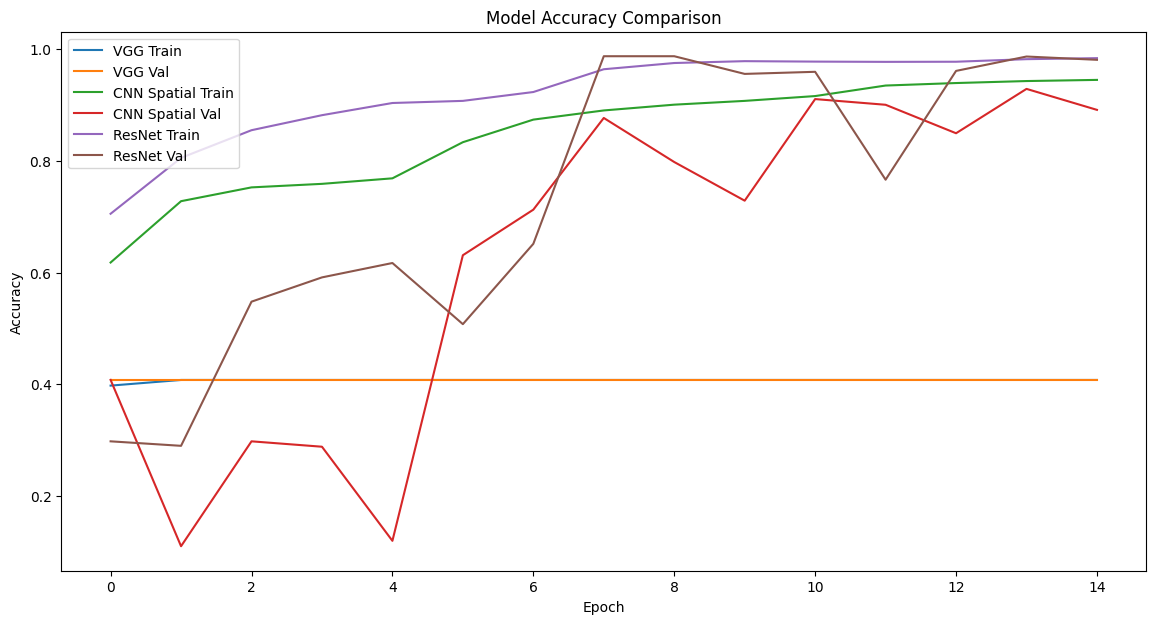

30/30 [==============================] - 9s 300ms/step - loss: 0.0489 - accuracy: 0.9807
VGG Model: Loss = 1.2809860706329346, Accuracy = 0.40804290771484375
CNN Spatial Model: Loss = 0.6597372889518738, Accuracy = 0.8911527991294861
ResNet Model: Loss = 0.048926565796136856, Accuracy = 0.9806970357894897
Found 1871 images belonging to 4 classes.
30/30 [==============================] - 10s 326ms/step
VGG Model Classification Report:
              precision    recall  f1-score   support

        Cyst       0.00      0.00      0.00       557
      Normal       0.41      1.00      0.58       763
       Stone       0.00      0.00      0.00       208
       Tumor       0.00      0.00      0.00       343

    accuracy                           0.41      1871
   macro avg       0.10      0.25      0.14      1871
weighted avg       0.17      0.41      0.24      1871

CNN Spatial Model Classification Report:
              precision    recall  f1-score   support

        Cyst       0.81      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Add, Dropout, Layer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Function to create a VGG-like model
def create_vgg_like_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Function to create a CNN with spatial attention model
class SpatialAttention(Layer):
    def init(self):
        super(SpatialAttention, self).init()

    def build(self, input_shape):
        self.conv1 = Conv2D(filters=1, kernel_size=(7, 7), padding='same', activation='sigmoid')

    def call(self, inputs):
        attention = self.conv1(tf.reduce_mean(inputs, axis=-1, keepdims=True))
        return inputs * attention

def create_cnn_spatial_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(SpatialAttention())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(SpatialAttention())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(SpatialAttention())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(SpatialAttention())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(SpatialAttention())
    model.add(GlobalAveragePooling2D())

    model.add(Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Function to create a ResNet-like model
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, 1, strides=stride)(x)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

def create_resnet_like_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Set parameters
input_shape = (224, 224, 3)
num_classes = 4

# Build the models
vgg_model = create_vgg_like_model(input_shape, num_classes)
cnn_spatial_model = create_cnn_spatial_model(input_shape, num_classes)
resnet_model = create_resnet_like_model(input_shape, num_classes)

# Compile the models
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_spatial_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode="reflect"
)

train_generator = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

val_datagen = ImageDataGenerator(rescale=1/255.0)

val_generator = val_datagen.flow_from_directory(
    './dataset/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

# Train the models
history_vgg = vgg_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

history_cnn_spatial = cnn_spatial_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

history_resnet = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# Plotting accuracy values for comparison
plt.figure(figsize=(14, 7))
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.plot(history_cnn_spatial.history['accuracy'])
plt.plot(history_cnn_spatial.history['val_accuracy'])
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['VGG Train', 'VGG Val', 'CNN Spatial Train', 'CNN Spatial Val', 'ResNet Train', 'ResNet Val'], loc='upper left')
plt.show()

# Evaluate the models on the validation data
vgg_eval = vgg_model.evaluate(val_generator)
cnn_spatial_eval = cnn_spatial_model.evaluate(val_generator)
resnet_eval = resnet_model.evaluate(val_generator)

print(f'VGG Model: Loss = {vgg_eval[0]}, Accuracy = {vgg_eval[1]}')
print(f'CNN Spatial Model: Loss = {cnn_spatial_eval[0]}, Accuracy = {cnn_spatial_eval[1]}')
print(f'ResNet Model: Loss = {resnet_eval[0]}, Accuracy = {resnet_eval[1]}')

# Generate predictions for the test set
test_generator = val_datagen.flow_from_directory(
    './dataset/test',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

vgg_pred = vgg_model.predict(test_generator)
cnn_spatial_pred = cnn_spatial_model.predict(test_generator)
resnet_pred = resnet_model.predict(test_generator)

# Convert predictions to class indices
vgg_y_pred = np.argmax(vgg_pred, axis=1)
cnn_spatial_y_pred = np.argmax(cnn_spatial_pred, axis=1)
resnet_y_pred = np.argmax(resnet_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Get the class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Print the classification report for each model
print('VGG Model Classification Report:')
print(classification_report(y_true, vgg_y_pred, target_names=class_labels))

print('CNN Spatial Model Classification Report:')
print(classification_report(y_true, cnn_spatial_y_pred, target_names=class_labels))

print('ResNet Model Classification Report:')
print(classification_report(y_true, resnet_y_pred, target_names=class_labels))

# Print the confusion matrix for each model
print('VGG Model Confusion Matrix:')
print(confusion_matrix(y_true, vgg_y_pred))

print('CNN Spatial Model Confusion Matrix:')
print(confusion_matrix(y_true, cnn_spatial_y_pred))

print('ResNet Model Confusion Matrix:')
print(confusion_matrix(y_true, resnet_y_pred))